In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

pd.set_option("display.max_columns", None)
  
# fetch dataset 
steel_plates_faults = fetch_ucirepo(id=198) 
  
# features and targets (as pandas dataframes) 
X = steel_plates_faults.data.features 
y = steel_plates_faults.data.targets 

In [2]:
print("Dataset size:", X.shape)
print("Targets size:", y.shape)

Dataset size: (1941, 27)
Targets size: (1941, 7)


In [3]:
x_missing = X.isna().sum().sum()
y_missing = y.isna().sum().sum()
print(f"X missing values: {x_missing}")
print(f"y missing values: {y_missing}")

X missing values: 0
y missing values: 0


In [4]:
x_unique = X.nunique(axis=0).index.to_list()
y_unique = y.idxmax(axis=1).unique()
print("Unique values in X:", x_unique)
print("Unique values in y:", y_unique)


Unique values in X: ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Minimum_of_Luminosity']
Unique values in y: ['Pastry' 'Z_Scratch' 'K_Scratch' 'Stains' 'Dirtiness' 'Bumps'
 'Other_Faults']


In [5]:
x_missing = X.isna().sum().sum()
y_missing = y.isna().sum().sum()
print(f"X missing values: {x_missing}")
print(f"y missing values: {y_missing}")

X missing values: 0
y missing values: 0


In [6]:
y_single = y.idxmax(axis=1)
print(y_single.unique())
y_single.head()

['Pastry' 'Z_Scratch' 'K_Scratch' 'Stains' 'Dirtiness' 'Bumps'
 'Other_Faults']


0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
dtype: object

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

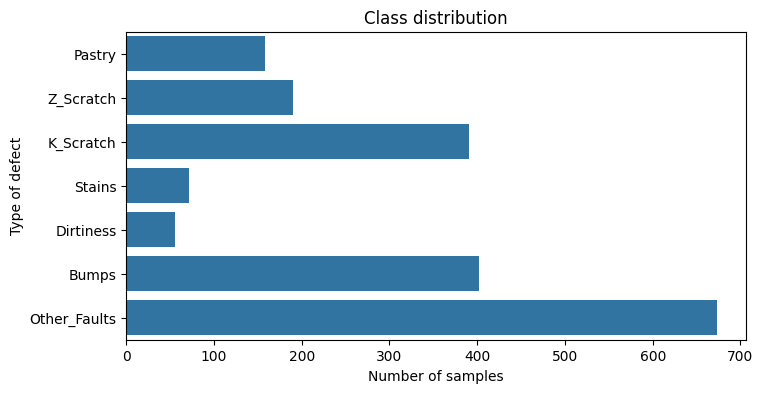

Other_Faults    673
Bumps           402
K_Scratch       391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(y_single)
plt.title("Class distribution")
plt.xlabel("Number of samples")
plt.ylabel("Type of defect")
plt.show()

y_counts = y_single.value_counts()
display(y_counts)


In [9]:
class_balance = y_single.value_counts()/len(y_single)
print(class_balance)

Other_Faults    0.346728
Bumps           0.207110
K_Scratch       0.201443
Z_Scratch       0.097888
Pastry          0.081401
Stains          0.037094
Dirtiness       0.028336
Name: count, dtype: float64


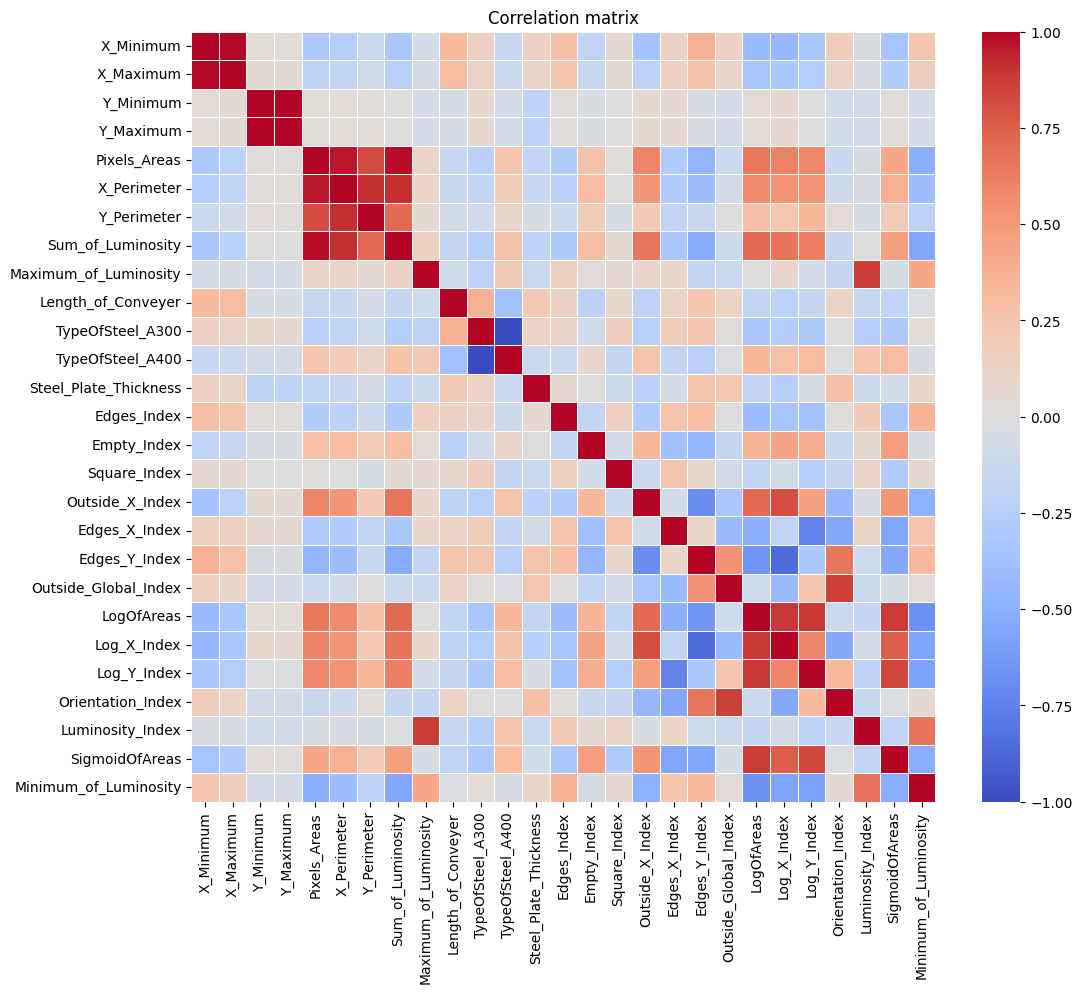

In [21]:
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix")
plt.savefig("figs/correlation_matrix.png")
plt.show()

In [11]:
high_corr = [(i, j) for i in corr.columns for j in corr.columns if (abs(corr.loc[i, j]) > 0.9) and (i != j)]
print("Features with high correlation:")
for i, j in high_corr:
    print(f"{i} <-> {j} (correlation = {corr.loc[i, j]:.2f})")

Features with high correlation:
X_Minimum <-> X_Maximum (correlation = 0.99)
X_Maximum <-> X_Minimum (correlation = 0.99)
Y_Minimum <-> Y_Maximum (correlation = 1.00)
Y_Maximum <-> Y_Minimum (correlation = 1.00)
Pixels_Areas <-> X_Perimeter (correlation = 0.97)
Pixels_Areas <-> Sum_of_Luminosity (correlation = 0.98)
X_Perimeter <-> Pixels_Areas (correlation = 0.97)
X_Perimeter <-> Y_Perimeter (correlation = 0.91)
X_Perimeter <-> Sum_of_Luminosity (correlation = 0.91)
Y_Perimeter <-> X_Perimeter (correlation = 0.91)
Sum_of_Luminosity <-> Pixels_Areas (correlation = 0.98)
Sum_of_Luminosity <-> X_Perimeter (correlation = 0.91)
TypeOfSteel_A300 <-> TypeOfSteel_A400 (correlation = -1.00)
TypeOfSteel_A400 <-> TypeOfSteel_A300 (correlation = -1.00)


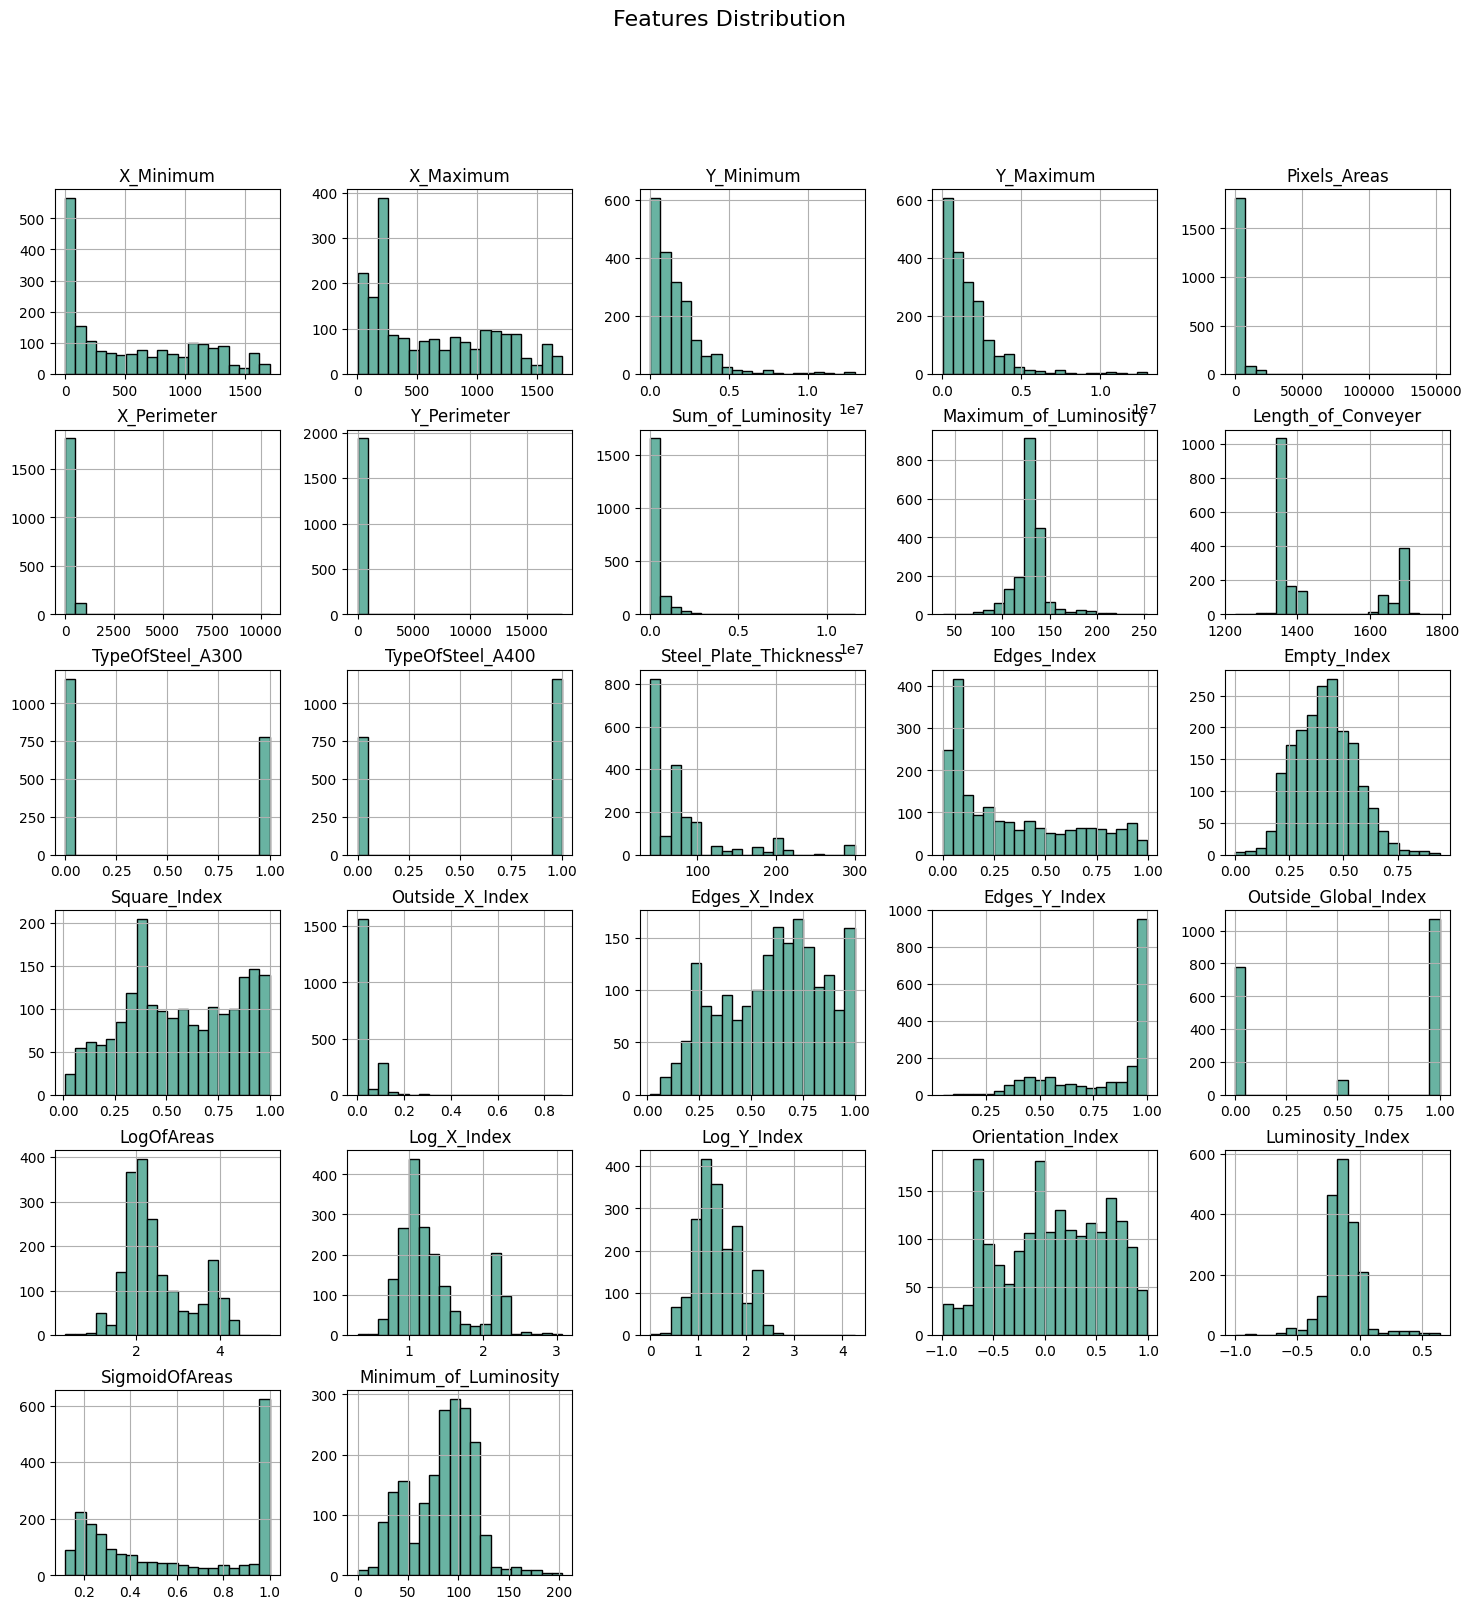

In [ ]:
X.hist(figsize=(18, 18), bins=20, color="#69b3a2", edgecolor="black")
plt.suptitle("Features Distribution", fontsize=16)
plt.show()
